# Worlds richest sports league Dataset

# Table of content

           1. Data loading and overview
           2. Data cleaning and preprocessing 
           3. Exploratory data analysis
           4. Predictive analysis
           5. Discussion and future works

# Data loading and overview 

In [1]:
import os
directory = "top_expensive_leagues"
os.mkdir(directory)
print(f"Directory'{directyory}'created successfully")

Directory'top_expensive_leagues'created successfully


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = '/kaggle/input/worlds-richest-sports-leagues-dataset/top_expensive_leagues.csv'
df = pd.read_csv("top_expensive_leagues.csv")

# Display the first few rows of the dataframe
df.head()

,League ID,League Name,Country,Sport,Revenue (USD),Average Player Salary (USD),Top Team,Total Teams,Founded Year,Viewership
0,L001,Premier League,England,Football,5.275330e+09,12080000.0,Liverpool,16,1886,485.90
1,L002,Serie A,India,American Football,7.088640e+09,6730000.0,Inter Milan,13,1977,135.01
2,L003,IPL,England,American Football,7.930520e+09,14360000.0,Chennai Super Kings,13,1979,157.49
3,L004,La Liga,Spain,American Football,4.972890e+09,13720000.0,Atletico Madrid,22,1999,245.71
4,L005,Serie A,Italy,Basketball,6.265740e+09,7450000.0,Juventus,16,1963,52.83


In [16]:
# Check for missing values
print(df.isnull().sum())


# Check data types
print(df.dtypes)




League ID                      0
League Name                    0
Country                        0
Sport                          0
Revenue (USD)                  0
Average Player Salary (USD)    0
Top Team                       0
Total Teams                    0
Founded Year                   0
Viewership                     0
dtype: int64
League ID                       object
League Name                     object
Country                         object
Sport                           object
Revenue (USD)                  float64
Average Player Salary (USD)    float64
Top Team                        object
Total Teams                      int64
Founded Year                     int64
Viewership                     float64
dtype: object


# Exploratory Data Analysis

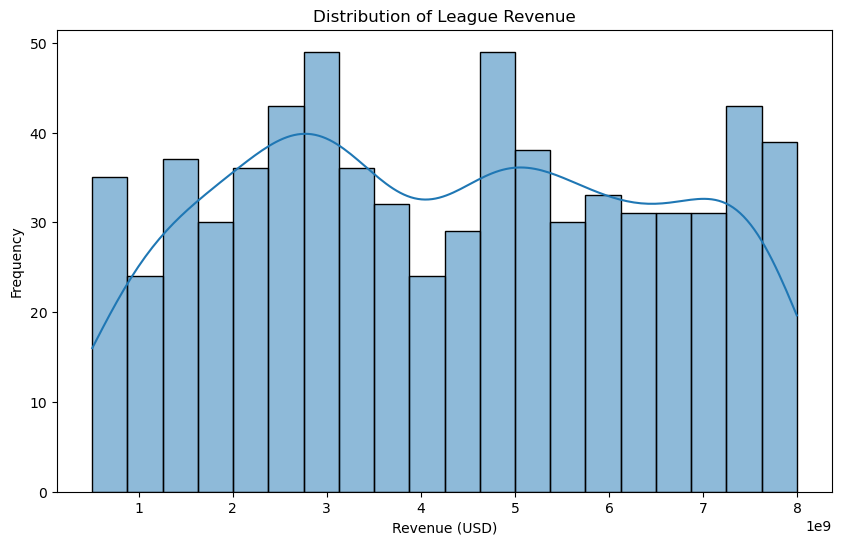

In [5]:
# Revenue distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue (USD)'], bins=20, kde=True)
plt.title('Distribution of League Revenue')
plt.xlabel('Revenue (USD)')
plt.ylabel('Frequency')
plt.show()

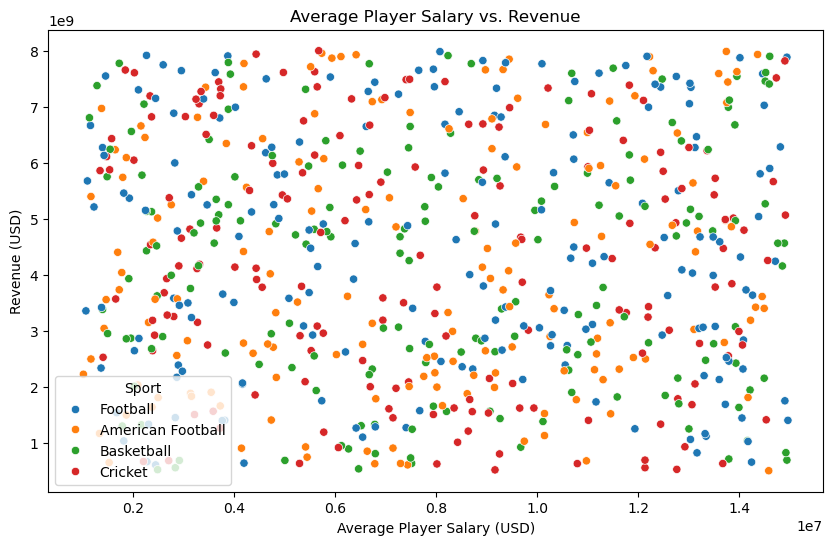

In [18]:
# Average player salary vs. revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Average Player Salary (USD)', y='Revenue (USD)', hue='Sport')
plt.title('Average Player Salary vs. Revenue')
plt.xlabel('Average Player Salary (USD)')
plt.ylabel('Revenue (USD)')
plt.legend(title='Sport')
plt.show()

In [21]:
df

,League ID,League Name,Country,Sport,Revenue (USD),Average Player Salary (USD),Top Team,Total Teams,Founded Year,Viewership
0,L001,Premier League,England,Football,5.275330e+09,12080000.0,Liverpool,16,1886,485.90
1,L002,Serie A,India,American Football,7.088640e+09,6730000.0,Inter Milan,13,1977,135.01
2,L003,IPL,England,American Football,7.930520e+09,14360000.0,Chennai Super Kings,13,1979,157.49
3,L004,La Liga,Spain,American Football,4.972890e+09,13720000.0,Atletico Madrid,22,1999,245.71
4,L005,Serie A,Italy,Basketball,6.265740e+09,7450000.0,Juventus,16,1963,52.83
...,...,...,...,...,...,...,...,...,...,...
695,L696,Bundesliga,France,Football,2.280400e+09,2970000.0,RB Leipzig,25,1914,159.88
696,L697,Ligue 1,USA,Cricket,6.945200e+08,12130000.0,Lyon,20,2009,194.31
697,L698,Premier League,USA,Football,5.251210e+09,4780000.0,Manchester United,29,2004,79.36
698,L699,NBA,Germany,American Football,5.898850e+09,11020000.0,Miami Heat,22,1897,238.50


In [23]:
df['Country'].value_counts()

Country
India      108
Germany    106
England    102
Spain      101
Italy       99
USA         92
France      92
Name: count, dtype: int64

In [25]:
df['League Name'].value_counts()

League Name
Premier League    97
Serie A           97
La Liga           92
Bundesliga        87
NFL               83
NBA               83
IPL               81
Ligue 1           80
Name: count, dtype: int64

In [27]:
df['Sport'].value_counts()

Sport
Football             188
Cricket              174
Basketball           173
American Football    165
Name: count, dtype: int64

(array([1., 0., 0., 2., 0., 0., 0., 0., 0., 1.]),
 array([165. , 167.3, 169.6, 171.9, 174.2, 176.5, 178.8, 181.1, 183.4,
        185.7, 188. ]),
 <BarContainer object of 10 artists>)

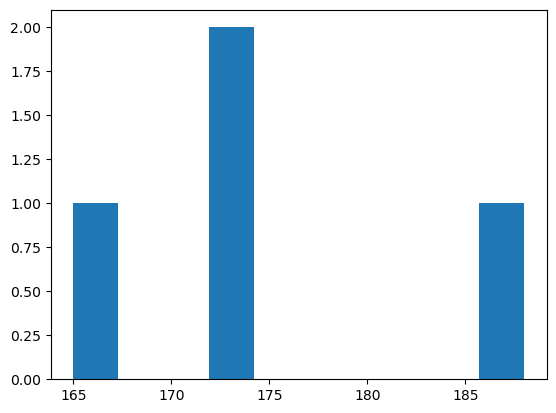

In [41]:
plt.hist(df['Sport'].value_counts())

([<matplotlib.patches.Wedge at 0x129bc4ab4d0>,
 [Text(0.9974017125254553, 0.4638855719369692, 'Premier League'),
  Text(0.28787874119544954, 1.061661824861252, 'Serie A'),
  Text(-0.6059866476721999, 0.9180306001670147, 'La Liga'),
  Text(-1.0814301436227423, 0.20126809102313134, 'Bundesliga'),
  Text(-0.9207410127326074, -0.6018604385338288, 'nfl'),
  Text(-0.2687744809920628, -1.0666584637865335, 'NBA'),
  Text(0.5169029652143999, -0.9709847190108406, 'IPL'),
  Text(1.0298583569282562, -0.38651230855566926, 'Ligue 1')],
 [Text(0.5440372977411574, 0.2530284937838014, '13.86%'),
  Text(0.15702476792479064, 0.5790882681061373, '13.86%'),
  Text(-0.33053817145756353, 0.5007439637274625, '13.14%'),
  Text(-0.5898709874305866, 0.10978259510352617, '12.43%'),
  Text(-0.5022223705814222, -0.32828751192754296, '11.86%'),
  Text(-0.14660426235930696, -0.5818137075199272, '11.86%'),
  Text(0.2819470719351272, -0.5296280285513675, '11.57%'),
  Text(0.5617409219608669, -0.2108248955758196, '11.43

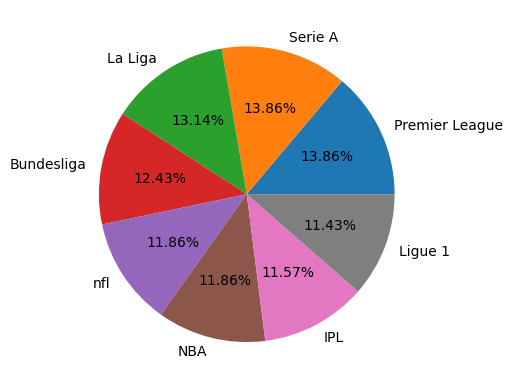

In [55]:
plt.pie(df['League Name'].value_counts(),autopct="%0.02f%%",labels=['Premier League','Serie A','La Liga','Bundesliga','nfl','NBA','IPL','Ligue 1'])

# Predictive Analysis


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Predicting Revenue based on Average Player Salary and Total Teams
X = df[['Average Player Salary (USD)', 'Total Teams']]
y = df['Revenue (USD)']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Predicting Revenue based on Average Player Salary and Total Teams
X = df[['Average Player Salary (USD)', 'Total Teams']]
y = df['Revenue (USD)']